In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime

In [2]:
network = "VG"
station = "TMKS"
location = "00"
channel = "EHZ"

nslc = "{}.{}.{}.{}".format(network, station, location, channel)

In [3]:
bands: dict[str, list[float]] = {
    'HF' : [0.1, 8.0, 16.0],
    'LF' : [0.1, 4.5, 8.0],
}

In [4]:
current_dir: str = os.getcwd()
input_directory: str = os.path.join(current_dir, "output")
output_directory: str = os.path.join(current_dir, "output", "dsar")
os.makedirs(output_directory, exist_ok=True)

figures_directory: str = os.path.join(input_directory, "figures")
os.makedirs(figures_directory, exist_ok=True)

combined_HF_csv: str = os.path.join(input_directory, "HF", 'combined_{}Hz_{}.csv'.format('-'.join(map(str,bands['HF'])), nslc))
combined_LF_csv: str = os.path.join(input_directory, "LF", 'combined_{}Hz_{}.csv'.format('-'.join(map(str,bands['LF'])), nslc))

In [5]:
# start date, end date of eruption
continous_eruptions: list[list[str]] = [
    ['2017-11-21', '2017-11-29'],
    ['2018-06-27', '2018-07-16'],
    ['2018-07-24', '2018-07-27'],
]

# Single eruption
single_eruptions: list[str] = [
    '2017-11-25',
    '2017-11-26',
    '2017-11-27',
    '2017-11-29',
    '2017-12-08',
    '2017-12-09',
    '2017-12-10',
    '2017-12-11',
    '2017-12-12',
    '2017-12-23',
    '2017-12-24',
    '2017-12-26',
    '2017-12-28',
    '2018-01-01',
    '2018-01-03',
    '2018-01-11',
    '2018-01-15',
    '2018-01-17',
    '2018-01-18',
    '2018-01-19',
    '2018-01-20',
    '2018-01-22',
    '2018-01-23',
    '2018-01-24',
    '2018-02-13',
    '2018-03-11',
    '2018-03-26',
    '2018-04-06',
    '2018-04-15',
    '2018-04-30',
    '2018-05-19',
    '2018-05-29',
    '2018-06-10',
    '2018-06-13',
    '2018-06-15',
    '2018-06-27',
    '2018-07-02',
    '2018-07-03',
    '2018-07-04',
    '2018-07-05',
    '2018-07-06',
    '2018-07-08',
    '2018-07-09',
    '2018-07-11',
    '2018-07-13',
    '2018-07-15',
    '2018-07-16',
    '2018-07-21',
    '2018-07-24',
    '2018-07-25',
    '2018-07-27']

In [6]:
HF = pd.read_csv(combined_HF_csv, names=["datetime", "values"], 
                 index_col='datetime', parse_dates=True)
LF = pd.read_csv(combined_LF_csv, names=["datetime", "values"], 
                 index_col='datetime', parse_dates=True)


In [7]:
HF

,values
datetime,
2017-10-18 00:00:00,6.208363e-15
2017-10-18 00:10:00,7.380559e-01
2017-10-18 00:20:00,1.811908e+00
2017-10-18 00:30:00,8.930925e-01
2017-10-18 00:40:00,7.993184e-01
...,...
2018-07-31 23:20:00,6.075836e-01
2018-07-31 23:30:00,6.985912e-01
2018-07-31 23:40:00,7.346555e-01


In [8]:
LF

,values
datetime,
2017-10-18 00:00:00,6.802138e-14
2017-10-18 00:10:00,2.151316e+00
2017-10-18 00:20:00,7.032605e+00
2017-10-18 00:30:00,2.747559e+00
2017-10-18 00:40:00,2.319844e+00
...,...
2018-07-31 23:20:00,1.815933e+00
2018-07-31 23:30:00,2.126889e+00
2018-07-31 23:40:00,2.359685e+00


In [9]:
df = pd.DataFrame()

In [10]:
df['LF'] = LF['values'].sort_index()
df['HF'] = HF['values'].sort_index()
df['DSAR'] = (LF['values'].sort_index()/HF['values'].sort_index())
df['DSAR_6'] = (LF['values']/HF['values']).rolling(6).median()

In [11]:
df

,LF,HF,DSAR,DSAR_6
datetime,,,,
2017-10-18 00:00:00,6.802138e-14,6.208363e-15,10.956411,NaN
2017-10-18 00:10:00,2.151316e+00,7.380559e-01,2.914841,NaN
2017-10-18 00:20:00,7.032605e+00,1.811908e+00,3.881327,NaN
2017-10-18 00:30:00,2.747559e+00,8.930925e-01,3.076455,NaN
2017-10-18 00:40:00,2.319844e+00,7.993184e-01,2.902277,NaN
...,...,...,...,...
2018-07-31 23:20:00,1.815933e+00,6.075836e-01,2.988778,2.964880
2018-07-31 23:30:00,2.126889e+00,6.985912e-01,3.044540,2.964880
2018-07-31 23:40:00,2.359685e+00,7.346555e-01,3.211961,2.967853


In [12]:
df = df.dropna()

In [13]:
df.loc[~df.index.duplicated(), :]

,LF,HF,DSAR,DSAR_6
datetime,,,,
2017-10-18 00:50:00,2.974201,0.972016,3.059826,3.068141
2017-10-18 01:00:00,2.918218,0.938653,3.108943,3.068141
2017-10-18 01:10:00,2.243599,0.775418,2.893407,3.068141
2017-10-18 01:20:00,2.895836,0.936254,3.093003,3.068141
2017-10-18 01:30:00,3.204720,1.026581,3.121741,3.076415
...,...,...,...,...
2018-07-31 23:20:00,1.815933,0.607584,2.988778,2.964880
2018-07-31 23:30:00,2.126889,0.698591,3.044540,2.964880
2018-07-31 23:40:00,2.359685,0.734656,3.211961,2.967853


In [14]:
# df = df.apply(lambda col: col.drop_duplicates())

In [15]:
df = df.interpolate('time').interpolate()

In [16]:
df

,LF,HF,DSAR,DSAR_6
datetime,,,,
2017-10-18 00:50:00,2.974201,0.972016,3.059826,3.068141
2017-10-18 01:00:00,2.918218,0.938653,3.108943,3.068141
2017-10-18 01:10:00,2.243599,0.775418,2.893407,3.068141
2017-10-18 01:20:00,2.895836,0.936254,3.093003,3.068141
2017-10-18 01:30:00,3.204720,1.026581,3.121741,3.076415
...,...,...,...,...
2018-07-31 23:20:00,1.815933,0.607584,2.988778,2.964880
2018-07-31 23:30:00,2.126889,0.698591,3.044540,2.964880
2018-07-31 23:40:00,2.359685,0.734656,3.211961,2.967853


In [17]:
filename = os.path.join(output_directory, "DSAR_{}.csv".format(nslc))
df.to_csv(filename)

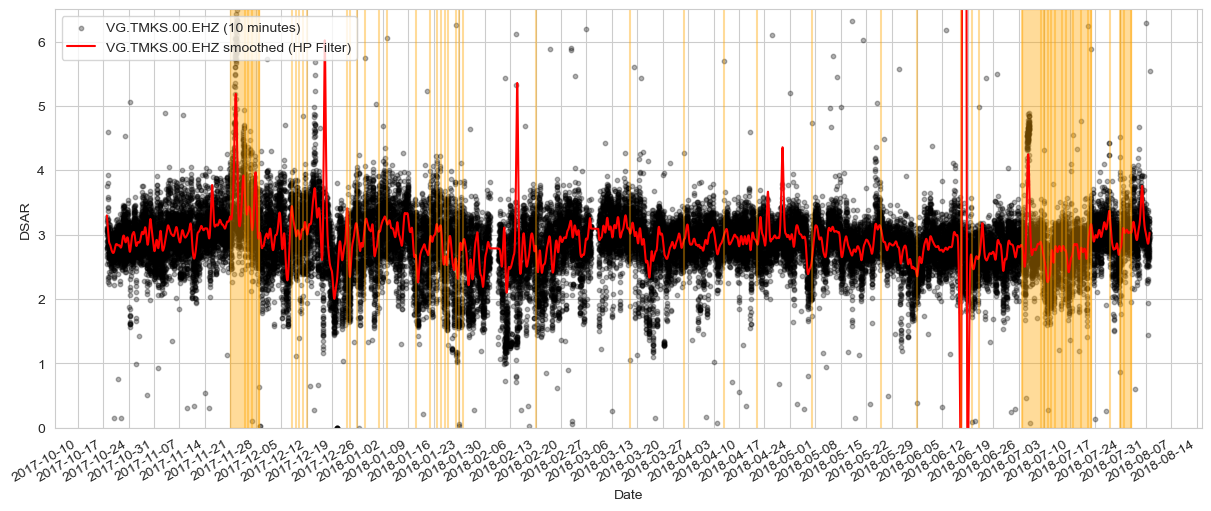

In [18]:
import matplotlib.dates as mdates

# HP filter documentation https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html
cycle,trend = hpfilter(df.DSAR, 1000000)

fig, axs = plt.subplots(figsize=(12, 5), layout="constrained")

# Plotting DSAR values
scatter = axs.scatter(df.index, df.DSAR, c= 'k', alpha=0.3, s=10, label='{} (10 minutes)'.format(nslc))

# Plotting smoothed DSAR values
smoothed_using_HP_filter = axs.plot(df.index, trend, c='red', label='{} smoothed (HP Filter)'.format(nslc), alpha=1)

axs.legend(loc=2)
axs.set_ylabel('DSAR')
axs.set_xlabel('Date')
axs.xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# You can change this values
axs.set_ylim(0,6.5)

for continous in continous_eruptions:
    axs.axvspan(continous[0], continous[1], alpha=0.4, color='orange')

for date in single_eruptions:
    axs.axvline(datetime.strptime(date, '%Y-%m-%d'), alpha=0.4, color='orange')

for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

In [21]:
fig.savefig(os.path.join(figures_directory, '{}.png'.format(nslc)))
print("✅ Saved figure {}".format(os.path.join(figures_directory, '{}.png'.format(nslc))))

✅ Saved figure D:\Projects\dsar\output\figures\VG.TMKS.00.EHZ.png
